In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0


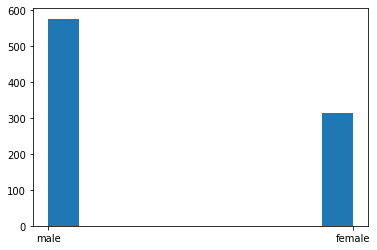

In [3]:
plt.hist(df.Sex)
plt.show()

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

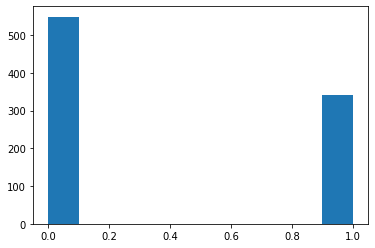

In [4]:
plt.hist(df.Survived)

In [5]:
df.Age.isnull().sum()

177

In [6]:
df.Age.mean()

29.69911764705882

In [7]:
df.Age.fillna(df.Age.mean(), inplace = True)

In [8]:
df.Age.isnull().sum()

0

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df

In [11]:
dfle.Sex = le.fit_transform(dfle.Sex)
dfle

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0


In [12]:
features = df.drop(['Survived', 'Name'], axis = 1)
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.000000,1,0
1,2,1,0,38.000000,1,0
2,3,3,0,26.000000,0,0
3,4,1,0,35.000000,1,0
4,5,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0
887,888,1,0,19.000000,0,0
888,889,3,0,29.699118,1,2
889,890,1,1,26.000000,0,0


In [13]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [15]:
len(x_train)

712

In [16]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch
135,136,2,1,23.000000,0,0
177,178,1,0,50.000000,0,0
710,711,1,0,24.000000,0,0
275,276,1,0,63.000000,1,0
164,165,3,1,1.000000,4,1
...,...,...,...,...,...,...
350,351,3,1,23.000000,0,0
304,305,3,1,29.699118,0,0
247,248,2,0,24.000000,0,2
144,145,2,1,18.000000,0,0


In [17]:
len(y_train)

712

In [18]:
y_train

135    0
177    0
710    1
275    1
164    0
      ..
350    0
304    0
247    1
144    0
31     1
Name: Survived, Length: 712, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

C:\Users\Sikkim\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
result = model.predict(x_test)

In [22]:
len(result)

179

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, result)
cm

array([[95, 14],
       [22, 48]], dtype=int64)

In [24]:
model.score(x_test, y_test) * 100

79.88826815642457

In [25]:
pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,95,14
Actual Yes,22,48


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.69      0.73        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [26]:
for i in result:
    if(i != 0):
        print("Passenger Survived")
    else: print("Passenger Not Survied")

Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Survived
Passenger Survived
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Survived
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
Passenger Survived
Passenger Not Survied
Passenger Survived
Passenger Survived
Passenger Not Survied
Passenger Not Survied
Passenger Not Survied
P

# Model with approx. 80% accuracy